<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/Load_and_Analyze_Results_of_pkl_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Results

I have a lot of pickle files.  Let's see if I can load them all up and put in a csv format.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [5]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive/Con3"

path = "/content/drive/MyDrive/Con3/PreExperiment_PA_Shfl_40D_Lambda1_Lambda2_Lambda3/"

# file_name = "delete_later.pkl"

import pickle 
import numpy as np
import pandas as pd

import os

dir = path

dict_of_run_files = {}

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # myfunction(file)
    with open(path + file, 'rb') as handle:
    # Call load method to deserialze
      dict_of_run_files[file] = pickle.load(handle)
      # list_of_files.extend(value for name, value in sorted(os.listdir(path)).items(), key=lambda item: item[0]) if name.startswith('run')
      count+=1 
      # print(unpickled_object == variable_to_be_deleted)
      # print(count, ". ", file, " was saved to dict_of_run_files. ")

      

How to get into the "dict_of_run_files" variable and dig out each of the contents we need in each pickle file.

We need at least the following information in a dataframe:

UniqueID | Date_Time |  Run | Rep | Lambda = (i,j,k) | Num of Epochs = (E1, E2, E3) | EarlyStop Patience = (P1, P2, P3) | Train/Val Accuracy | # of Misclassifications of [9t, 4p] | # Reverse Misclassifications | Final CM | Seed1 | Seed2 
-- | -- | --| --| --| --| --| --| -- | --| --| --| --
int | string | int | int | tuple | tuple | tuple | float | int | int | (1,100) (1,100), (1,100) | int | int





Unique ID can come later from just the order of the index or the key-name-of the file since each one has a unique last file_name.

Date_Time can come from the last part of the file name string, although in hind sight would have been nice to save to the admin key

Run really can't be a trusted Run Number anymore since I had some trouble with it, but can be cleaned up based off the lambda-epochs-patience values.

Rep is Rep specified in the Dictionary.



In [ ]:
# dict_of_run_files.keys()
# An example of a key is 'run1_rep_1_w[9,4]_L_1_1_1_E_5_5_25_P_0_0_25__2023_03_09_1329_.pkl'

import pandas as pd
data = pd.DataFrame()

# I later had the great idea of adding an admin file so some files have it some don't.

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # for key in dict_of_run_files.keys():
      try:
        dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]['admin']
      except:
        print(count, "No Admin Key")
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      else:
      # for variable in list(("lambda1", "lambda2", "lambda3")):
      #   # print(variable)
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      count+=1
# print(data.head)

data_transpose = data.transpose()
del(data)

# data_transpose.columns

# The try block lets you test a block of code for errors.
# The except block lets you handle the error.
# The else block lets you execute code when there is no error.
# The finally block lets you execute code, regardless of the result of the try- and except blocks.

# #This file does:
# print("Run:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['run'])
# print("Rep:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['rep'])

#so when filling in my dataframe with information I may need to use a for loop with an try-exception line.



In [116]:
# # data_transpose[0] #the "0" is the first column which is now the filename
# data_transpose[1][0] #index 0 of column 1 is all the information saved from the pickle file, minus the "key". it still appears to be in dictionary format
# data_transpose[1][0]["First"]  # this is the "first" training phase history
data = pd.DataFrame()
data['categorical_accuracy'] = np.ones((2,2)).tolist()
data['val_categorical_accuracy'] =np.ones((2,2)).tolist()
data['loss'] = np.ones((2,2)).tolist()
data['val_loss'] = np.ones((2,2)).tolist()
data['4T_9P'] = np.ones((2,2)).tolist()
data['9T_4P'] =np.ones((2,2)).tolist()
data['3ConfusionMatrices'] =np.ones((2,2)).tolist()



# Create a list of columns for the data-frame Data where you can no longer subset into smaller keys
# list_of_columns_for_data = []
#gather all the unique keys in the many nested dictionary files to define a new dataframe with those columns
for row in range(0,len(data_transpose)):
  data.at[row, 'filename'] = data_transpose[0][row]
  for column in list(data_transpose[1][row].keys()):
    try:
      len(list(data_transpose[1][row][column].keys()))
    except AttributeError:
      # print(f'data_transpose[1][{row}][{column}] has no keys')
      # list_of_columns_for_data.append(column)
      if(column=='3ConfusionMatrices'):
        data.at[row, column] = pd.DataFrame([data_transpose[1][row][column].tolist()])
      else:
        data.at[row, column] = data_transpose[1][row][column]


    else:
      # print(f'data_transpose[1][{row}][{column}] has keys')

      for subcolumn in list(data_transpose[1][row][column].keys()):
        # list_of_columns_for_data.append(subcolumn)
        # print(f'key: subcolumn {subcolumn}')
        try:
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        except KeyError:
          # print("KeyError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except TypeError:
          # print("TypeError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except ValueError:  #categorical accuracy causes a value error because you can't set the dataframe value to an array
          # print("ValueError")
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        # data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]

        #I also want the last value listed in '4T_9P', '9P_4P', 'val_loss',  'val_categorical_accuracy',  'loss',  'val_loss',
        if(subcolumn == '4T_9P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
          
        elif(subcolumn == '9T_4P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_categorical_accuracy' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        # print(subcolumn)

# # data



# #Create a column with just the last confusion matrix, the last values of 9t_4p, and 4t_9p
# len(data['categorical_accuracy'][0])  #Column 'Categorical Accuracy', Row0, shows 35 values
# data['categorical_accuracy'][0][-1]
# data['val_categorical_accuracy'][0][-1]
# len(data['9T_4P'][0])  #The array of values for '9T_4P' is length 35, and the last value is 12 
# data['9T_4P'][0][-1]  # to get the last value for row 0
 
    
# data_csv = data.to_csv("data.csv")
  
# from google.colab import files
# files.download('data.csv')

# data.drop_duplicates(subset=['3ConfusionMatrices'][0]) #fails TypeError 'unhashable type: numpy.ndarray'
# https://stackoverflow.com/questions/43855462/pandas-drop-duplicates-method-not-working-on-dataframe-containing-lists

data = data.drop(columns=['filename', '3ConfusionMatrices', 'First', 'Second', 'Third'])
 
data = data.loc[data.astype(str).drop_duplicates().index]

data = data.loc[data.dropna().index]



In [154]:
data.head()

,categorical_accuracy,val_categorical_accuracy,loss,val_loss,4T_9P,9T_4P,val_categorical_accuracy_last_value,val_categorical_accuracy_length,loss_last_value,loss_length,...,lambda2,lambda3,epochs1,epochs2,epochs3,es1,es2,es3,tf.keras.utils.set_random_seed,OS environment python hash seed value
1,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.3148580491542816, 0.24618777632713318, 0.20...","[47, 23, 16, 21, 14, 15, 18, 15, 15, 8, 13, 12...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 19, 13, 10...",0.966133,35.0,0.130588,35.0,...,1.0,1.0,5.0,5.0,25.0,0.0,0.0,25.0,342.0,56.0
2,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.3148580491542816, 0.24618777632713318, 0.20...","[47, 23, 16, 21, 14, 15, 18, 15, 15, 8, 13, 12...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 19, 15, 10...",0.966133,35.0,0.130595,35.0,...,1.0,1.0,5.0,5.0,25.0,0.0,0.0,25.0,342.0,56.0
3,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618780612945557, 0.2...","[47, 23, 16, 21, 14, 15, 18, 15, 15, 8, 13, 12...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 19, 15, 10...",0.965600,35.0,0.130146,35.0,...,1.0,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0
4,"[0.6842833161354065, 0.840499997138977, 0.8766...","[0.8594666719436646, 0.8970666527748108, 0.915...","[1.1485410928726196, 0.5977388024330139, 0.500...","[0.49246951937675476, 0.350545734167099, 0.335...","[338, 207, 140, 250, 96, 131, 149, 89, 135, 83...","[4, 2, 5, 0, 6, 2, 1, 4, 2, 7, 8, 6, 7, 3, 11,...",0.954933,35.0,0.214989,35.0,...,1.0,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0
5,"[0.6842833161354065, 0.840499997138977, 0.8766...","[0.8594666719436646, 0.8970666527748108, 0.915...","[1.14854097366333, 0.5977388024330139, 0.50062...","[0.4924694895744324, 0.3505457043647766, 0.335...","[338, 207, 140, 250, 96, 131, 149, 89, 135, 83...","[4, 2, 5, 0, 6, 2, 1, 4, 2, 7, 8, 6, 7, 3, 10,...",0.954933,35.0,0.218971,35.0,...,1.0,100.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0


In [159]:
#Sort the dataframe by Lambda1 Value

data.sort_values(by=['lambda1'], inplace=True, ascending=True)
data['lambda1'].unique()

df1 = data[data['lambda1']==1]
df100 = data[data['lambda1']==100]
df1000 = data[data['lambda1']==1000]

At this point, 4/12/2023, I come back to this old file, I want to plot all the loss values and label them with the Lambda-Lambda-Lambda Combination, or at least save them so I can plot them easily somewhere else.

>  I'm currently having trouble with the coloring



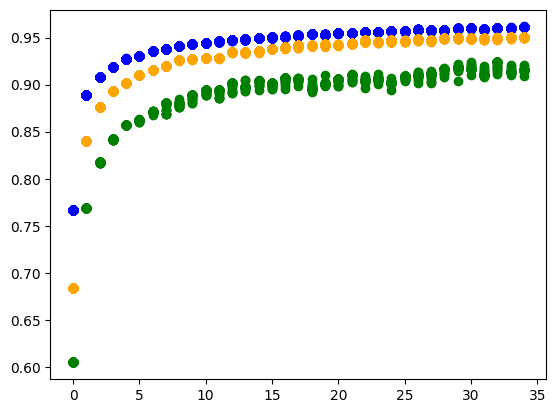

In [181]:
import matplotlib.pyplot as plt 


# train_loss = data['loss']
# valid_loss = data['val_loss']
# lambda1_value = data['lambda1']
# x_axis = range(1, len(train_loss))


# for i in (train_loss.index):
#   x_axis = range(0, len(train_loss[i]))
#   # print("i is ", i, "and len of x_axis is ", len(x_axis), " which better be ", len(train_loss[i]))

#   plt.scatter(x_axis, train_loss[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap='viridis', label='Training Loss') 
#   plt.scatter(x_axis, valid_loss[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap='viridis',  label='Validation Loss', linestyle=':') 


# # plt.legend() 
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train and Validation Loss vs Epochs')
# plt.show() 

cmap = plt.cm.get_cmap('viridis', 3)

for df, color in zip([df1, df100, df1000], ['blue', 'orange', 'green']):
  # train_acc = df['categorical_accuracy']
  # valid_acc = df['val_categorical_accuracy']
  for i, row in df.iterrows():
    # print(" i = ", i,  " row = ", row)
    # x_axis = range(0,len(train_acc[i]))
    # # print("i is ", i, "and len of x_axis is ", len(x_axis), " which better be ", len(train_acc[i]))

    plt.scatter(x=range(0, len(row['categorical_accuracy'])), y=row['categorical_accuracy'], color=color)

    # plt.scatter(x_axis, train_acc[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap, label='Training Acc') 
    # plt.scatter(x_axis, valid_acc[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap,  label='Validation Acc', linestyle=':') 

    # plt.scatter(x_axis, train_acc[i], color=color, marker='o'  , label='Training Acc') 
    # plt.scatter(x_axis, valid_acc[i], color=color, marker='x',  label='Validation Acc', linestyle=':') 



# plt.legend() 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs Epochs')
plt.colorbar()
plt.show() 


 

In [151]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


groups = data.groupby['lambda1']
groups 

for name, group in groups:

    sns.scatterplot(x='x', y='y', hue='lambda1', data=group, label=name)
    
# This code will create a scatterplot with different colors for each group based on the value of the variable 'lambda1'.
sns.legend()
plt.show()

TypeError: ignored

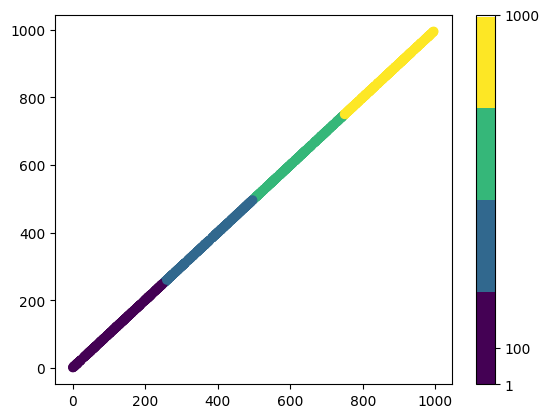

In [92]:
# # # generate an array of 1000 random numbers
# # data = np.random.randint(1,1000,1000)

# # # create a color map with three colors
# # cmap = plt.cm.get_cmap('RdYlGn',5)

# # # set the colors in the color map to the values 1, 100 and 1000
# # norm = plt.Normalize(1,1000)

# # # map the colors to the corresponding values
# # colors = [cmap(norm(value)) for value in data]

# # # plot the data with the colors
# # plt.scatter(data, data, c=colors)

# # # display the plot
# # plt.show()




# # generate an array of 1000 random numbers
# data = np.random.randint(1,1000,1000)

# # create a new figure
# fig, ax = plt.subplots()

# # use the matplotlib colormap 'viridis' that ranges from 0-1
# cmap = plt.get_cmap('viridis', 4)

# # create a scatterplot of the data and color it according to the integer values
# scatter = ax.scatter( data, data, c=data, cmap=cmap )

# # create a colorbar and set the limits to the integer values
# cbar = plt.colorbar(scatter)
# cbar.set_ticks([1,100,1000])

# # show the plot
# plt.show()

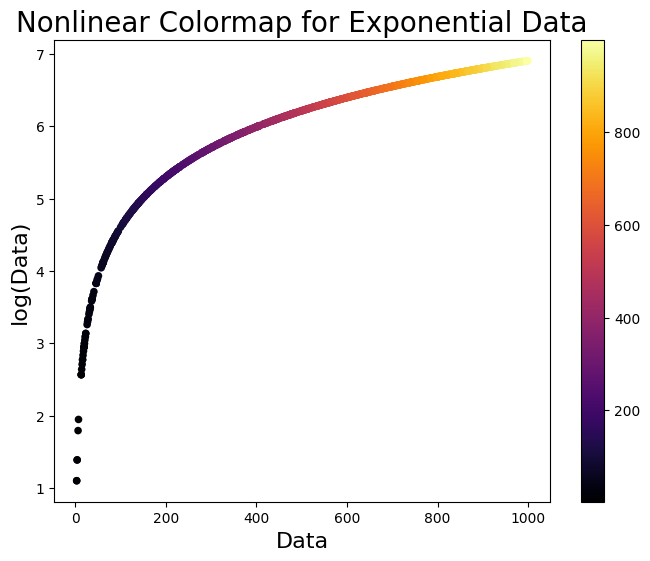

In [95]:
# # use matplotlib to write code on how to color a nonlinear colormap for exponential data:
 
# import matplotlib.pyplot as plt
# import numpy as np

# # generate an array of 1000 random numbers
# data = np.random.randint(1,1000,1000)

# # set the colormap
# cmap = plt.cm.inferno

# # create a plot
# plt.figure(figsize=(8,6))

# # draw a scatter plot of the data
# plt.scatter(data, np.log(data), c=data, cmap=cmap, edgecolor='none', s=30)

# # set the colorbar
# plt.colorbar()

# # set the title and labels
# plt.title('Nonlinear Colormap for Exponential Data', fontsize=20)
# plt.xlabel('Data', fontsize=16)
# plt.ylabel('log(Data)', fontsize=16)

# # show the plot
# plt.show()

In [97]:
# Use seaborn to write python code on color nonlinear data with colors defined by lambda, and lambda = 1, 100, and 1000:

import seaborn as sns
import numpy as np

# Generate data
x = np.arange(0, 10, 0.1)
y = np.sin(x)
# Set color data
color_data = {1: 'red', 100: 'blue', 1000: 'green'}

# Create a new column in the dataframe with the corresponding color for each point
df = pd.DataFrame({'x': x, 'y': y})
df['colors'] = df['x'].apply(lambda x: color_data[int(x * 100)])

# Plot the data
sns.scatterplot(x='x', y='y', hue='colors', data=df)

KeyError: ignored

<Axes: xlabel='x', ylabel='y'>

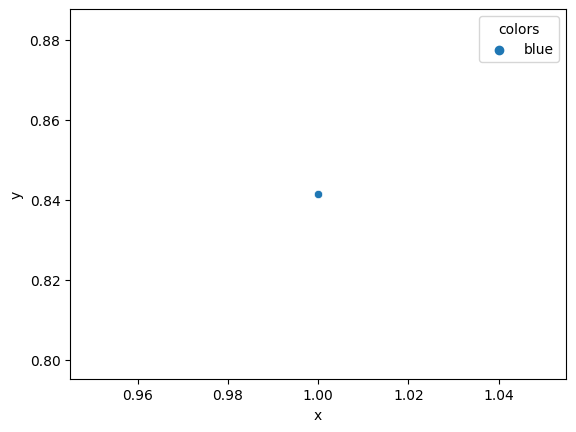

In [106]:

# import seaborn as sns
# import numpy as np
# import pandas as pd

# # Generate data
# x = np.arange(0, 10, 0.1)
# y = np.sin(x)

# # Set color data
# color_data = {1: 'red', 100: 'blue', 1000: 'green'}
# # color_data[0] = 'red'

# # # Create a new column in the dataframe with the corresponding color for each point
# # df = pd.DataFrame({'x': x, 'y': y})  #KeyError: 2
# # df['colors'] = df['x'].apply(lambda x: color_data[int(x * 10)])

# # # Plot the data
# # sns.scatterplot(x='x', y='y', hue='colors', data=df)

# # Fix
# # Create a new column in the dataframe with the corresponding color for each point
# df = pd.DataFrame({'x': x, 'y': y})
# df['colors'] = df['x'].apply(lambda x: color_data.get(int(x * 100)))

# # Plot the data
# sns.scatterplot(x='x', y='y', hue='colors', data=df)
# # sns.color_palette(n_colors=4)

In [87]:
data_to_save = pd.DataFrame()
data_to_save = data[['lambda1',	'lambda2',	'lambda3',	'epochs1',	'epochs2',	'epochs3',	'es1',	'es2',	'es3', '9T_4P_last_value',	'4T_9P_last_value', 'val_categorical_accuracy_last_value']].copy()

for row in range(len(data_to_save)):
  # print(row)
  try:
    data_to_save.loc[row, 'lambdacombo'] = str(int(data_to_save.loc[row, 'lambda1'])) +"-"+ str(int(data_to_save.loc[row, 'lambda2'])) +"-"+ str(int(data_to_save.loc[row, 'lambda3']))
  except ValueError:
    data_to_save.loc[row, 'lambdacombo'] = str((data_to_save.loc[row, 'lambda1'])) +"-"+ str((data_to_save.loc[row, 'lambda2'])) +"-"+ str((data_to_save.loc[row, 'lambda3']))                               

data_to_save['lambdacombo'].value_counts()
data_csv = data_to_save.to_csv("data.csv")

from google.colab import files
files.download('data.csv')

<ipython-input-87-45d73fb494a4>:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_to_save = data[['lambda1',	'lambda2',	'lambda3',	'epochs1',	'epochs2',	'epochs3',	'es1',	'es2',	'es3', '9T_4P_last_value',	'4T_9P_last_value', 'val_categorical_accuracy_last_value']].copy()


IndexError: ignored

In [ ]:
import pandas as pd
data_to_save = pd.read_csv('data.csv')

#### LambdaCombo Variable Column

"LambdaCombo" is a column to make all three-phases into a unique string value, so that the 27-unique combos can be easily identified.  These are the unique "runs".  I can't trust that each run is numbered to identify the lambdas correctly, so I use the lambda-combo columns. 

In [ ]:
data_to_save.head()
data_to_save.lambdacombo.value_counts()
data_to_save.lambdacombo.value_counts().index

1-1-1             38
1-1000-1          30
1-1-100           30
100-1-100         30
1-1000-100        30
100-1-1           30
1-100-1000        30
1-100-100         30
1-100-1           30
1-1-1000          30
1-1000-1000       29
100-1-1000        29
100-100-1         27
100-100-100       27
1000-1-1          26
1000-100-1        26
1000-1-1000       26
1000-1-100        26
100-100-1000      26
100-1000-1000     26
100-1000-100      26
100-1000-1        26
1000-1000-1000    25
1000-100-100      24
1000-100-1000     24
1000-1000-1       24
1000-1000-100     24
nan-nan-nan        1
Name: lambdacombo, dtype: int64

The dependent variable of interest is the misclassifications of highest occurence, which in originally running the "lousy" neural network of 40 dense connections was misidentifying a 9 as a 4.  Because after 30 runs of just baseline costs (1-1-1) this was the highest misclassification, this became the objective to minimize in creating higher and higher costs for misclassifying a 9 as a 4.  This could also be called the most "hard" classification, since it was naturally the most occuring. The dataframe of saved data is sorted by the misclassification rate to enable easier viewing of groups in the following graph 

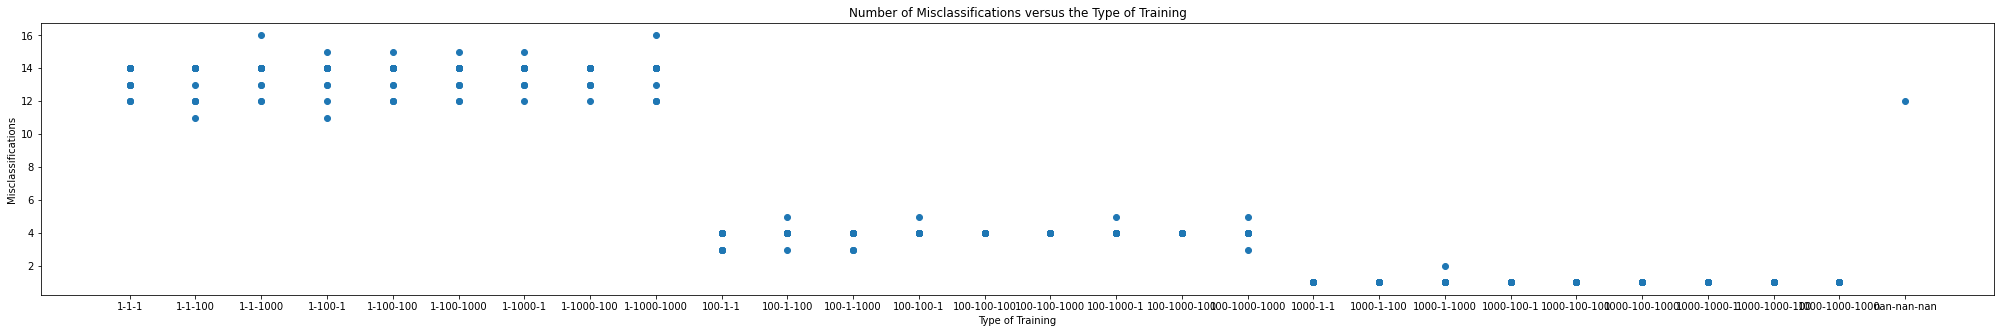

In [ ]:
# importing the required module
import matplotlib.pyplot as plt

# data_to_save.sort_values('9T_4P_last_value', inplace=True)
data_to_save.sort_values('lambdacombo', inplace=True)

# # x axis values
x = data_to_save['lambdacombo']
# corresponding y axis values
y = data_to_save['9T_4P_last_value']

plt.figure(figsize=(35,5))
# plotting the points 
plt.scatter(x, y)
  
# naming the x axis
plt.xlabel('Type of Training')
# naming the y axis
plt.ylabel('Misclassifications')
  
# giving a title to my graph
plt.title('Number of Misclassifications versus the Type of Training')
  
# function to show the plot
plt.show() 

We can see that the lowest misclassifications happen with the highest-cost of misclassification in the first phase.   These average around 2.   The next group of misclassifications happens around when the cost of misclassification is '100' in the first phase.  And finally the last group of misclassifications, which is the highest overall, is in the cost of misclassifications that are '1' in the initial phase.  It doesn't apppear that the second phase makes a large difference overall in any of the groups.  For example 1-1-1, which is a constant rate of '1' cost seems to have the same results   as other runs where the second phase was 1000.

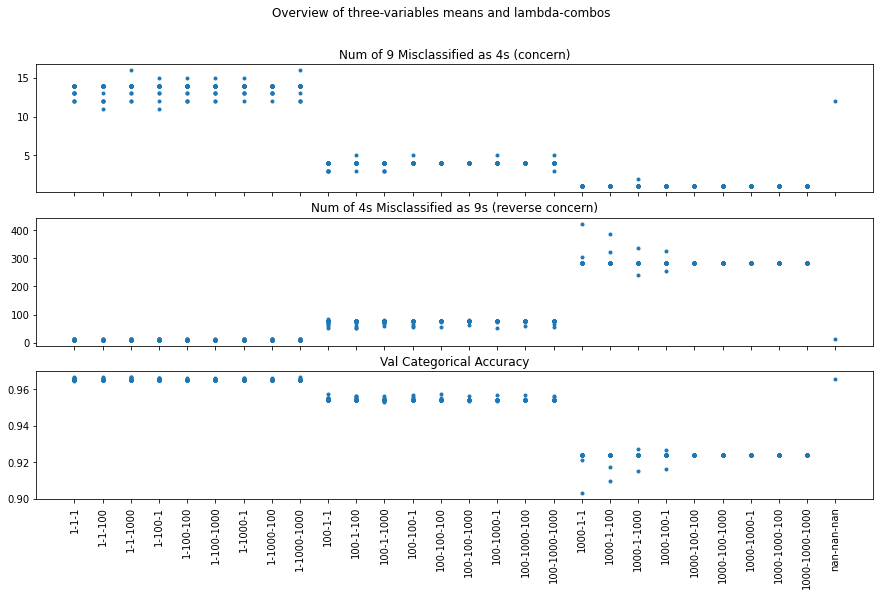

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,8), sharex=True)
fig.suptitle('Overview of three-variables means and lambda-combos')
plt.xticks(rotation=90)
  
# ax1.scatter(x, y1, c = "b", marker='^')
ax1.scatter(data_to_save['lambdacombo'], data_to_save['9T_4P_last_value'], marker='.')
ax1.set_title('Num of 9 Misclassified as 4s (concern)')

# ax2.scatter(x, y2, c="orange")
ax2.set_title('Num of 4s Misclassified as 9s (reverse concern)')
ax2.scatter(data_to_save['lambdacombo'], data_to_save['4T_9P_last_value'], marker='.')
 
# ax3.scatter(x, y3, c='green')
ax3.scatter(data_to_save['lambdacombo'], data_to_save['val_categorical_accuracy_last_value'], marker='.')
ax3.set_title('Val Categorical Accuracy')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
  

A look at the above data with just the averages is below.  You can visually see there are no real differences between the averages for each inital phase of the data.

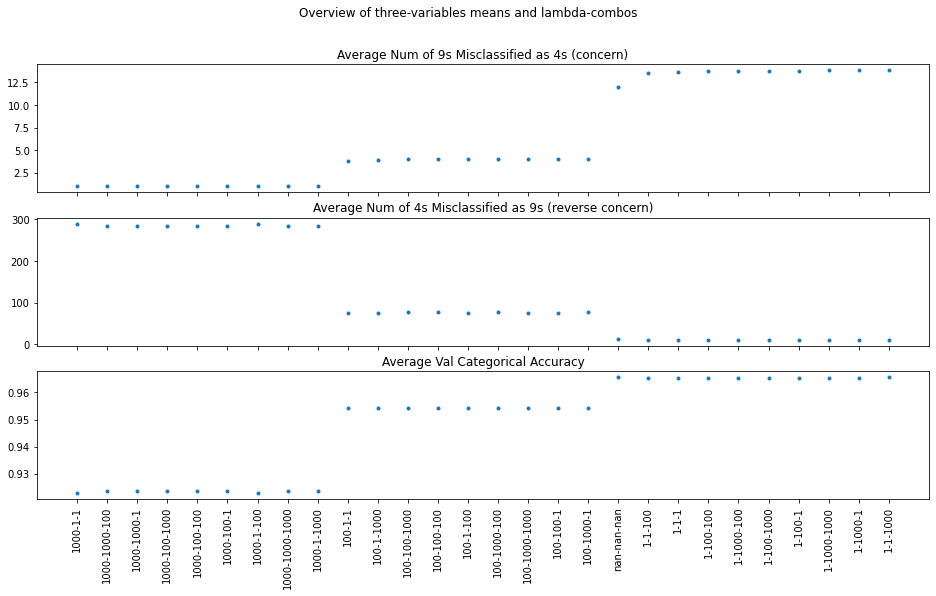

In [ ]:
# data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value'].describe()
data_combo_summary = data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value', '4T_9P_last_value'].mean()
data_combo_summary.sort_values('9T_4P_last_value', inplace=True)

# # x axis values
x = data_combo_summary.index

# corresponding y axis values
y1 = data_combo_summary['9T_4P_last_value']
y2 = data_combo_summary['4T_9P_last_value']
y3 = data_combo_summary['val_categorical_accuracy_last_value']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,8), sharex=True)
fig.suptitle('Overview of three-variables means and lambda-combos')
plt.xticks(rotation=90)
  
# ax1.scatter(x, y1, c = "b", marker='^')
ax1.scatter(x, y1, marker='.')
ax1.set_title('Average Num of 9s Misclassified as 4s (concern)')

# ax2.scatter(x, y2, c="orange")
ax2.set_title('Average Num of 4s Misclassified as 9s (reverse concern)')
ax2.scatter(x, y2, marker='.')
 
# ax3.scatter(x, y3, c='green')
ax3.scatter(x,y3, marker='.')
ax3.set_title('Average Val Categorical Accuracy')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
  

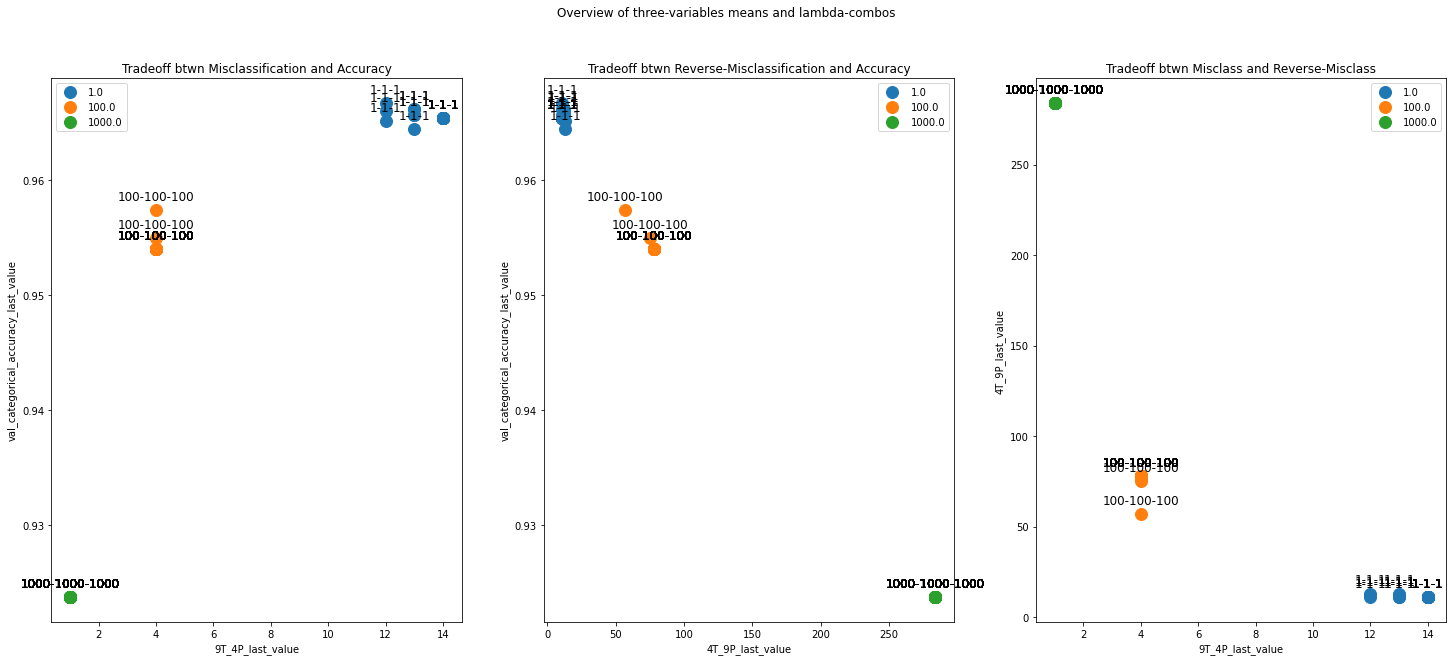

In [ ]:
# from pandas.core.ops import rand_

## Now to change this to the Tradeoff Graphs I made but somehow didn't save =O
data_to_save.sort_values('lambdacombo', inplace=True, ignore_index=True)

# groups = data_to_save.groupby('lambdacombo')

def narrow_data(i):
    # Define narrow area of dataframe to graph based off "i" the phase-1 value
    df = data_to_save.where(data_to_save['lambda1']==i).dropna()
    df = df.where(data_to_save['lambda2']==i).dropna()
    df = df.where(data_to_save['lambda3']==i).dropna()
    return df

def plot_data(df, x,y,ax, lambdas, title):
  # ax.scatter(x,y, marker='.', )
  # original_lambda_combo_string = 'nan-nan-nan'

  for j in (df[lambdas].index):
      # print("j:", j)
      # colors = ['black', 'orange', 'blue']
      # df = data_to_save.where(data_to_save['lambda1']==i).dropna()
      # print("df[x][j]:", df[x][j], )
      # print("df[y][j]:", df[y][j], )
      # print("df['lambda2'][j]:", df['lambda2'][j], )
      # print("annotate text:", str(df[lambdas][j]))

      # ax.scatter(df[x][j]+0*np.random.random(), df[y][j], marker='.', c=df['lambda2'][j]) 
      ax.annotate(text=str(df[lambdas][j]),  xy=(df[x][j], df[y][j]), textcoords="offset points", 
                  xytext=(0+0*np.random.randint(-10,10),10+0*np.random.randint(-10,10)), 
                  ha='center', size=12)
      # original_lambda_combo_string = lambdas[j]
      ax.set_xlabel(str(x))
      ax.set_ylabel(str(y))


  


  groups = df.groupby('lambda2')
  for name, group in groups:
    # print('name: ', name, 'group: ' , group)  
    ax.plot(group[x], group[y], marker='o', linestyle='', markersize=12, label=name)
  ax.set_title(title)
  ax.legend()


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))
fig.suptitle('Overview of three-variables means and lambda-combos')
# plt.xticks(rotation=90)

list_of_phase_1_values = [1, 100, 1000]
# list_of_phase_1_values = [1]

for i in (list_of_phase_1_values):
  df = narrow_data(i=i)
  plot_data(df=df , x='9T_4P_last_value', y='val_categorical_accuracy_last_value', ax=ax1, lambdas='lambdacombo', title='Tradeoff btwn Misclassification and Accuracy')
  plot_data(df=df, x='4T_9P_last_value',y='val_categorical_accuracy_last_value',ax=ax2, lambdas='lambdacombo', title='Tradeoff btwn Reverse-Misclassification and Accuracy')
  plot_data(df=df, x='9T_4P_last_value',y='4T_9P_last_value',ax=ax3, lambdas='lambdacombo', title='Tradeoff btwn Misclass and Reverse-Misclass')

 

It doesn't seem to matter what you do in the middle or later phases according to this experiment.   So more to follow is to see if there is a difference with middle and late phase training.  Sequential testing in JMP does show that lambda1 is most significant.  Now what?

In [ ]:
# thoughts


In [ ]:
#Save a file to myDrive/con3

# Analyze 

\\


In [ ]:
# import numpy as np
# import pandas as pd
# empty_cm = np.zeros((10,10))  
# empty_cm=pd.DataFrame(empty_cm)

# empty_cm.columns = ['0p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p']
# empty_cm.index = ['0t', '1t', '2t', '3t', '4t', '5t', '6t', '7t', '8t', '9t']

# # print(myvar_cm_average)

# empty_cm_array = np.asarray(empty_cm)
# empty_cm_array_1_100 = np.reshape(empty_cm_array,(1,100))
# # print(cm_average_array)

# df = empty_cm
# df_new = pd.DataFrame(empty_cm_array_1_100,  columns=pd.MultiIndex.from_product([ df.index,df.columns]))
# df_new.columns.to_flat_index()
# df_new.columns   = ['_'.join(col) for col in df_new.columns.values]

# # Now convert combined_cms of size 30x100 to a panda dataframe
# cms_df = pd.DataFrame(combined_cms, columns=[df_new.columns], index=["First", "Second", "Third"])

# cms_df

# for run in runs:
#   for rep in reps:
#     for phase in phases:
#       pd.DataFrame(combined_history_dictionary[run,rep]["3ConfusionMatrices"], columns=[df_new.columns], index=["First", "Second", "Third"])

In [ ]:
# combined_cms[0,]

In [ ]:
# combined_cms_df["9t_4p"]

In [ ]:
# np.average(combined_cms_df["9t_4p"])

In [ ]:
# csv_filename = file_name[:-4] + ".csv"

# combined_cms_df.to_csv(csv_filename)
# # 

# from google.colab import files
# files.download(csv_filename )

# print("Downloading ", csv_filename , " of shape ", combined_cms_df.shape)

In [ ]:
# df = pd.DataFrame(sum(var)/len(var), columns=["Values"]) 
# # print(df)

# df.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# (df.sort_values(by="Values", ascending=False)[0:20])


# df_sorted = df.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal


# df_sorted.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# import math

# print("On average...")
# print("Num 1 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[0])/10), " as a ", df_sorted["Values"].index[0]%10, "  (", (df_sorted["Values"].values[0]), " times)" )
# print("Num 2 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[1])/10), " as a ", df_sorted["Values"].index[1]%10, "  (", (df_sorted["Values"].values[1]), " times)" )
# print("Num 3 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[2])/10), " as a ", df_sorted["Values"].index[2]%10, "  (", (df_sorted["Values"].values[2]), " times)" )




In [ ]:
# df_percents = pd.DataFrame( ((sum(var)*100/len(var)).reshape((10,10))/truth_num_per_category).reshape((100)), columns = ["Values"])


# df_sorted_percents = df_percents.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal

# df_sorted_percents.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# print("On average .. ")
# print("Num 1 percent misclassifications", math.floor((df_sorted_percents["Values"].index[0])/10), " as ", df_sorted_percents["Values"].index[0]%10, (df_sorted_percents["Values"].values[0]), " percent" )
# print("Num 2 percent misclassifications", math.floor((df_sorted_percents["Values"].index[1])/10), " as ", df_sorted_percents["Values"].index[1]%10,  (df_sorted_percents["Values"].values[1]), " percent" )
# print("Num 3 percent misclassifications", math.floor((df_sorted_percents["Values"].index[2])/10), " as ", df_sorted_percents["Values"].index[2]%10, (df_sorted_percents["Values"].values[2]), " percent" )







First column name  | Second column name 
-------------------|------------------
Row 1, Col 1       | Row 1, Col 2 
Row 2, Col 1       | Row 2, Col 2 